In [1]:
from jax.random import PRNGKey, split

import hyperiax
from hyperiax.tree.topology import symmetric_topology, asymmetric_topology
from hyperiax.tree import HypTree
from hyperiax.plotting import plot_tree_text, plot_tree_2d_scatter, plot_tree
import jax
from jax import numpy as jnp

In [2]:
key = PRNGKey(0)

# Creating the Tree

First, we initialize the tree. 
This can be done by mutliple methods

``hyperiax.tree.builders.symmetric_tree(h,branching)``

builds a symmetric tree, with h depth, and branching
note the tree does not include a length of the branches

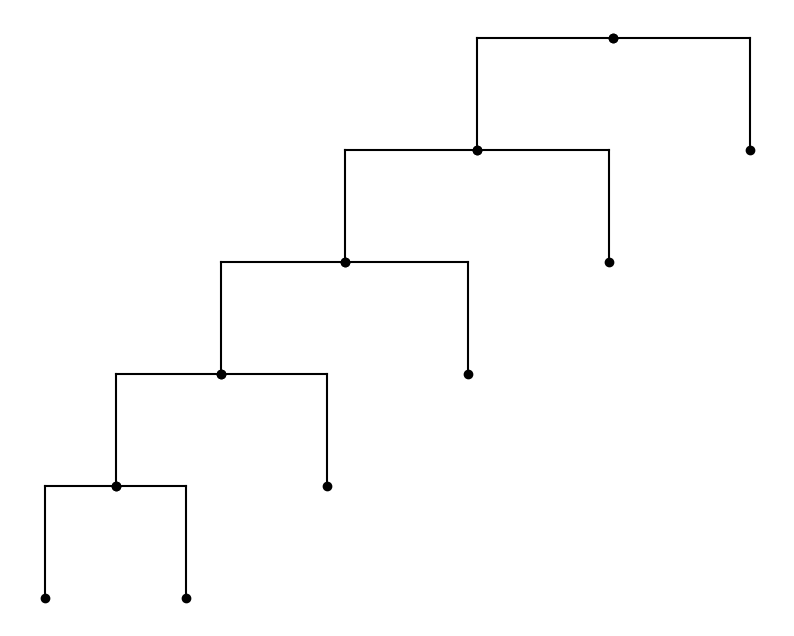

In [3]:

topology = hyperiax.tree.topology.asymmetric_topology(5)
tree = HypTree(topology)

plot_tree(tree)

## Add names 

It is also possible to add names to the tree. The names are stored in the tree like the other properties


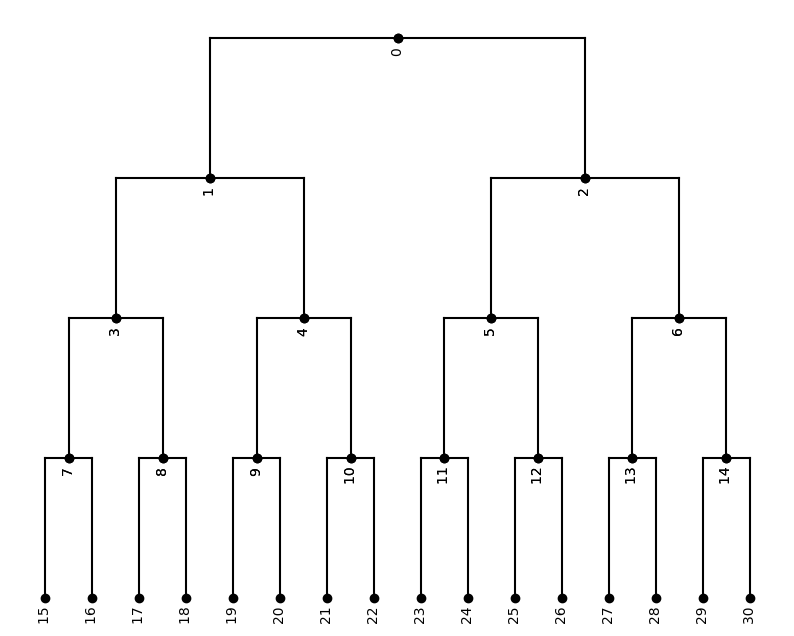

In [4]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)



for i,node in enumerate(tree.iter_topology_bfs()):
    node.name = str(i)

plot_tree(tree,inc_names=True)


# Add branch length 
Lets say we now want to set the `edge_length` to be a decaying value as a function of the depth in the tree. Lets for the sake of example pick $l=exp(-ln(2)*d)$ where `d` is the depth of the node and `l` is the resulting `edge_length`. Each tree calculated the depth of each node, so we can use that here.

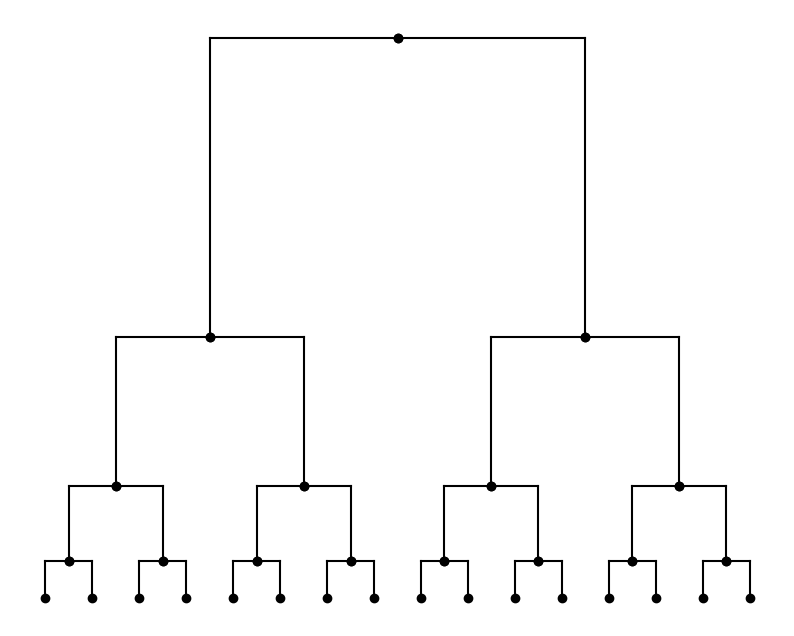

In [6]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)

tree.add_property('edge_length', shape=(1,))
tree.data['edge_length'] = jnp.exp(-jnp.log(2)*tree.node_depths)

plot_tree(tree)